In this notebook we will try to classificate if a particular object is a galaxy, star or quasar based on their spectral charectiristc. This dataset contains 100 000 observations that were gathered by SDSS (Sloan Digital Sky Survey) which is one of the more ambitious and influenctial task of astronomy. It's a project with a great task - creating the map of the sky which began in 2000 year. We will perform a lot of data manipulation such as outlier removing using several techniques and many many others. We will also try to determine which factors can determine what a particular observation is. The last part of this project will be a modeling part. Have a good reading :) 

# 1. Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('star_classification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# 2. Feature explanation

Lets explain some of the variables:

* <b>alpha</b> - one of the coordinates defining the position of an object in the celestial sphere. (Since they are shown for epoch J2000, the coordinate shown us the position of an object for date: 2000-01-01 12:00 UTC). It is shown as an hour angle.

* <b>delta</b> - second of the coordinates defining the position of an object in the celestial sphere. (Since they are shown for epoch J2000, the coordinate shown us the position of an object for date: 2000-01-01 12:00 UTC). It is shown in degrees, minutes and seconds. 

* u - ultraviolet filter in the photometric system (shown in magnitudo).

* g - green filter in the photometric system (shown in magnitudo).

* r - red filter in the photometric system (shown in magnitudo).

* i - near infrared filter in the photometric system.

* z - infrared filter in the photometric system.

* run_ID - number to identify a specific scan.

* rerun_ID - number to specify how the image was processed.

* cam_col - camera column to identify the scanline within the run.

* filed_ID - field number to identify the scanline within the run.

* spec_obj_ID - unique ID used for optical spectographic object.

* class - object class.

* redshift - redshift value based on the increase in wavelength.

* plate - plate ID that identifies each plate in SDSS.

* MJD - modified Julian Date indicates when the picture was taken.

* fiber_ID - id that identifies the fiber that pointed the light at the local plane in each observation.




As we see not all of the features must be used for object classification. For now we will stick just with several features such as : u, g, r, i, z, redshift

In [3]:
class_data = data[['u', 'g', 'r', 'i', 'z', 'redshift', 'class']]

In [4]:
class_data

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


# 3. Splitting the data

In this part we will create train and test dataset, but just for exploratory analysis.

In [5]:
from sklearn.model_selection import train_test_split

class_data['class'] = [0 if value == "GALAXY" else 1 if value == "QSO" else 2 for value in class_data['class']]



exploratory_set, rest_set = train_test_split(class_data, test_size=.33)

/var/folders/rd/z4g97_m5135b3yksvpxnxw1m0000gn/T/ipykernel_2477/1424618600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['class'] = [0 if value == "GALAXY" else 1 if value == "QSO" else 2 for value in class_data['class']]


# 4. Data Exploration

## 4.1 Checking descriptive statistics.

In [6]:
exploratory_set.describe()

,u,g,r,i,z,redshift,class
count,67000.000000,67000.000000,67000.000000,67000.000000,67000.000000,67000.000000,67000.000000
mean,21.930859,20.480514,19.643761,19.081928,18.617230,0.576625,0.619672
std,38.780151,38.762840,1.857049,1.759780,38.742414,0.734162,0.816428
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971,0.000000
25%,20.351225,18.965560,18.138370,17.731223,17.455137,0.054347,0.000000
50%,22.182620,21.097300,20.124185,19.400035,19.001700,0.421081,0.000000
75%,23.686965,22.123413,21.043748,20.395967,19.919593,0.703120,1.000000
max,30.660390,31.602240,29.374110,30.250090,27.805190,7.011245,2.000000


As we see there's some strange min values in several columns. Value -9999 usually mean two things:

* 1. Particular object was not visible in this particular light,

* 2. There was some error in data preprocessing stage. 

For this notebook we will delete all of the records in which particular columns have value -9999.000 .

In [7]:
exploratory_set = exploratory_set[(exploratory_set != -9999.).all(axis=1)]

In [8]:
exploratory_set.describe()

,u,g,r,i,z,redshift,class
count,66999.000000,66999.000000,66999.000000,66999.000000,66999.000000,66999.000000,66999.000000
mean,22.080427,20.630061,19.643783,19.081944,18.766749,0.576634,0.619651
std,2.250235,2.038390,1.857054,1.759788,1.768946,0.734164,0.816416
min,10.996230,10.671800,9.822070,9.469903,9.612333,-0.009971,0.000000
25%,20.351425,18.965760,18.138370,17.731215,17.455375,0.054352,0.000000
50%,22.182850,21.097340,20.124200,19.400060,19.001700,0.421111,0.000000
75%,23.686970,22.123415,21.043805,20.395985,19.919605,0.703121,1.000000
max,30.660390,31.602240,29.374110,30.250090,27.805190,7.011245,2.000000


## 4.2 Dealing with Outliers


Outliers can highly impact model performance. Since I assume, that our data can be well clustered(which we will check later), we can use `LocalOutlierFactor` to determine which points in our dataframe are considered as outliers. LocalOutlierFactor works in several steps:

* 1. Calculating the neighbour density - for each point we are calculating the neighbour density. This means, how much other points are in within particular neighbour.

* 2. Calculating "local rechability density" (LRD) - calcualting the local distance for each point to their nearest neighbourhood.

* 3. Calculating the "LOF" coefficient - for each point we are calculating local density of that point to the average local density of their neighbours.


In [9]:
from sklearn.neighbors import LocalOutlierFactor

def determine_outliers(X:pd.DataFrame , threshold)-> pd.DataFrame:
    """
    Function that removes particular observation from dataset, based on particular threshold.
    :param X: A training set.
    :param threshold: A threshold value. If particular ovservation have score below that value it will be removed from the dataset.

    :return: Dataframe without outliers.
    """
    LOF = LocalOutlierFactor()
    LOF.fit(X)
    predictions = LOF.negative_outlier_factor_
    print(f"Count of deleted outliers: {len(predictions[predictions<=threshold])}")
    return X[predictions > threshold]
    


In [10]:
exploratory_set_no_out = determine_outliers(exploratory_set, -1.75)

Count of deleted outliers: 1173


## 4.2 Checking balance of the classes.

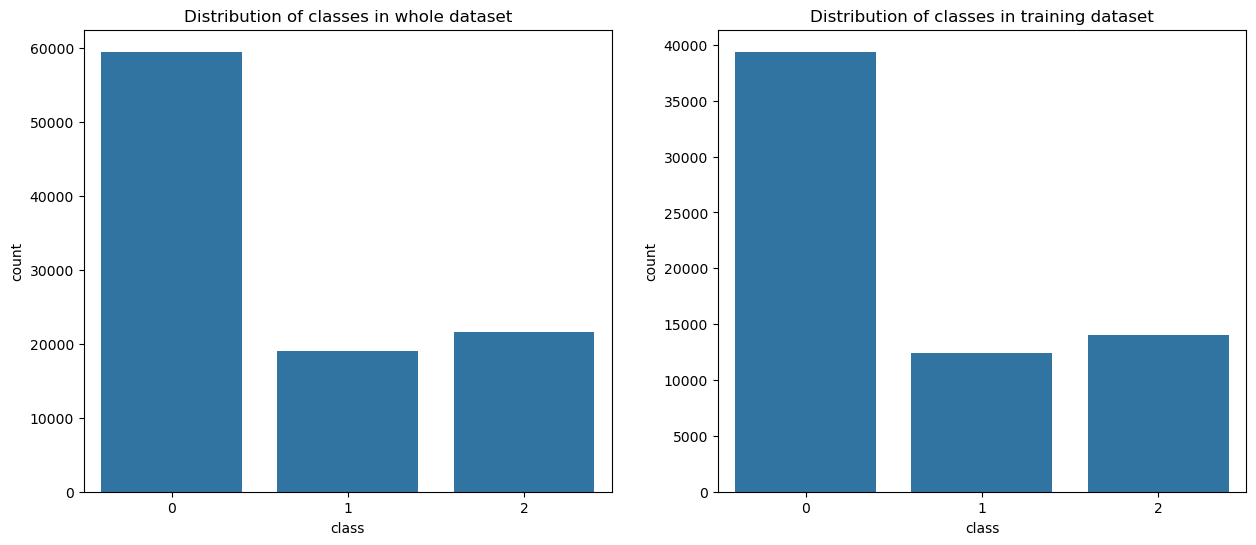

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

for i,frame in enumerate([class_data, exploratory_set_no_out]):
    sns.countplot(data = frame, x='class', ax=ax[i])
    if i == 0:
        ax[i].set_title("Distribution of classes in whole dataset");
    else:
        ax[i].set_title("Distribution of classes in training dataset");

As we see our classes are a little bit inbalanced. We can perform `SMOTE` (Symethric Minority Over-Sampling Technique) in order to rebalance the data. SMOTE algorithm will generate synthetic samples into our data, without the need of copying the real data. How does SMOTE work?

* 1. Picking an centroid: For each of the sample in minority class, SMOTE will pick a point from which the distance to n samples (for example 5) is the closest.

* 2. Creating synthetic samples: Based on the differences between the samples and their neighbors new samples are generated. Those new samples are placed in the staright line between the neighbor and the sample.


In [12]:
from imblearn.over_sampling import SMOTE

def sample_data(X: pd.DataFrame, k_neighbors: int):
    """
     Function that samples data for the minority classes.
     :param X: Dataset from which we will gather samples
     :n_neighbors: Number of records for which particular observation must be similar.
     :returns: Features and Target resampled.
    """
    features = X.drop('class', axis=1)
    target = X['class']
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_sampled, y_sampled = smote.fit_resample(features, target)
    return X_sampled, y_sampled
    

In [13]:
X_sampled, y_sampled = sample_data(exploratory_set_no_out, k_neighbors=20)



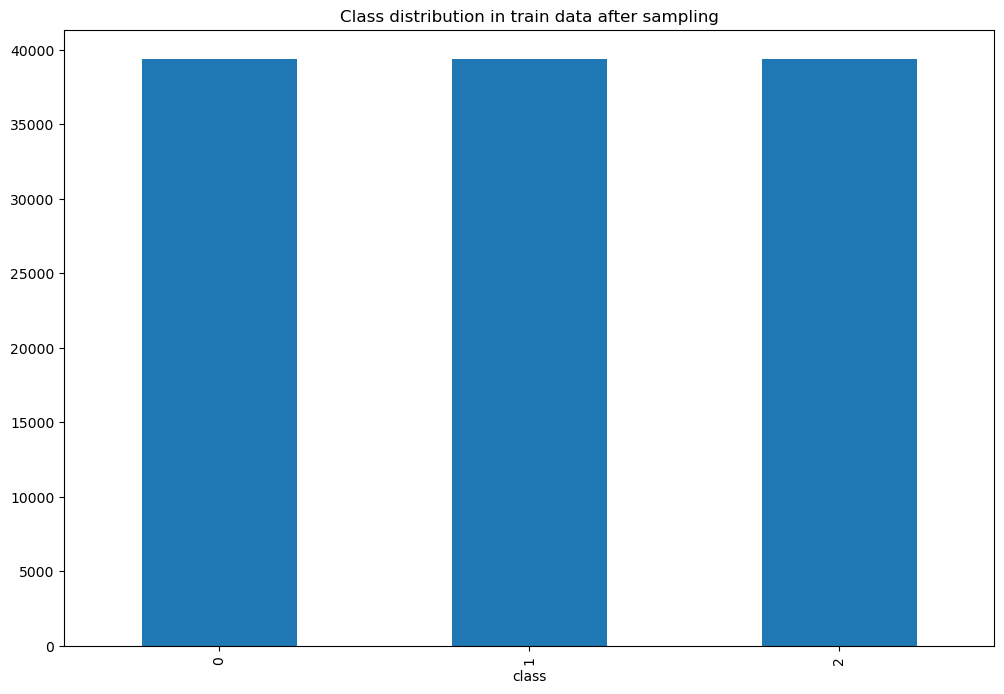

In [14]:
plt.figure(figsize=(12,8));
y_sampled.value_counts().sort_index().plot(kind='bar');
plt.title("Class distribution in train data after sampling");

Let's check how much the descriptive statistics changed after sampling the data.

In [15]:
X_sampled[X_sampled.columns[:-2]].describe()

,u,g,r,i
count,118140.000000,118140.000000,118140.000000,118140.000000
mean,21.755405,20.476552,19.718110,19.272905
std,2.140329,1.928440,1.810339,1.759209
min,14.593710,13.241620,12.562470,12.137410
25%,20.208505,19.066775,18.427980,18.061950
50%,21.752382,20.862375,20.182418,19.599970
75%,23.201071,21.858783,21.099356,20.648438
max,28.185940,27.414650,25.606610,25.422380


In [16]:
exploratory_set_no_out[exploratory_set_no_out.columns[:-3]].describe()

,u,g,r,i
count,65826.000000,65826.000000,65826.000000,65826.000000
mean,22.085137,20.633704,19.647436,19.082697
std,2.237864,2.024917,1.844371,1.745932
min,14.593710,13.241620,12.562470,12.137410
25%,20.357983,18.974733,18.148733,17.737210
50%,22.187910,21.106940,20.131895,19.406670
75%,23.684127,22.122910,21.044097,20.394437
max,28.185940,27.414650,25.606610,25.422380


As we see descriptive statistics have changed but not that much. In next chapter we will try to cluster the data.

# 5. Data Clustering

In this part, we will perform data clustering to check whether our classes are distinct from one another. First we can use PCA in order to reduce the dimensions in our data, and then we can use those dimensions to visualise the data.


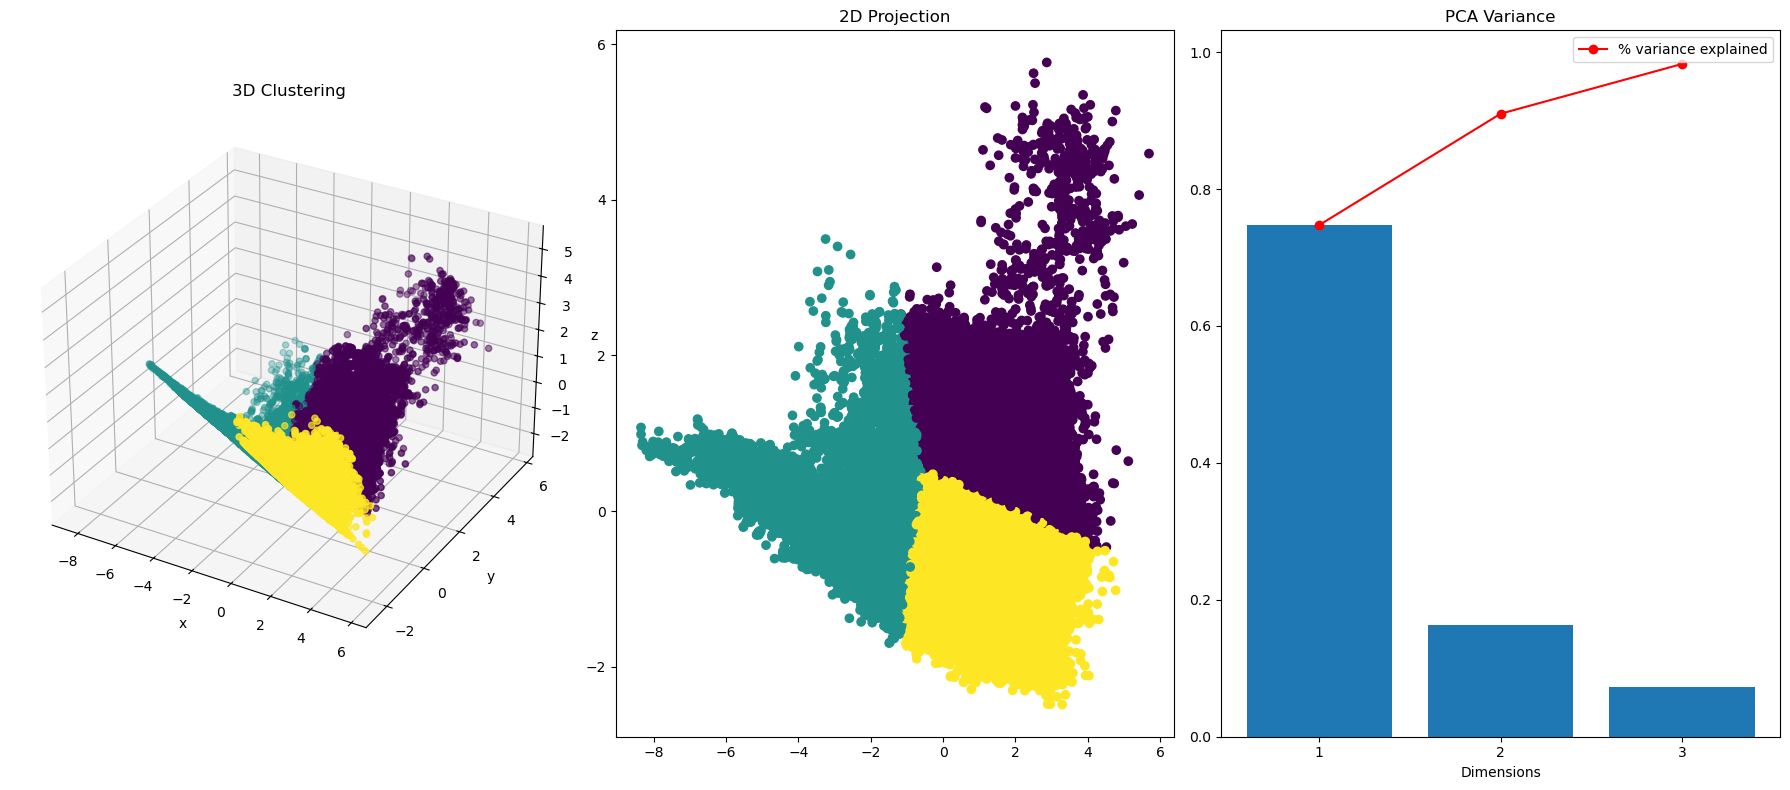

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

#Reducing Dimensions of the Data
pca = PCA(n_components=3, random_state=42)
X3D = pca.fit_transform(X_scaled)

#Clustering the Data
kmeans = KMeans(random_state=42, n_clusters=3)
preds = kmeans.fit_predict(X3D)

#Visualising the data

fig = plt.figure(figsize=(18, 8))


ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=preds, cmap='viridis')
ax1.set_title('3D Clustering')
ax1.set_xlabel("x");
ax1.set_ylabel("y");
ax1.set_zlabel("z");


ax2 = fig.add_subplot(132)
ax2.scatter(X3D[:, 0], X3D[:, 1], c=preds, cmap='viridis')
ax2.set_title('2D Projection')

ax3 = fig.add_subplot(133)
dims = [1,2,3]
var_explained = np.cumsum(pca.explained_variance_ratio_)
ax3.bar(dims, pca.explained_variance_ratio_)
ax3.plot(dims, var_explained, '-o', label="% variance explained", c='red')
ax3.set_xticks(dims)
ax3.set_xlabel("Dimensions")
ax3.set_title("PCA Variance");
ax3.legend()

plt.tight_layout()

As we see our data can be pretty good clustered with 3 clusters. Purple cluster lean towards negative values over X axis, Green Cluster seems to be leaning towards positive values in X axis and positive values in `Z` axis. Yellow cluster seems to be the cluster with the lowest varianve of them all. In terms of PCA we can reduce the number of dimensions from 6 to 3 and still get 98.27% of variance explained. We can use those predictions from KMeans model in order to build a classification model.

# 6. Pipelines

We can create multiple pipelines for clear preprocessing proces, and then combine them into one to make sure, that our data is ready for modeling proces. However, we will change a little bit of removing outliers. In this step we will use IQR method to remove outliers both from training and test data.

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
class IQRRemoval:
    def __init__(self, multiplier=1.5):
        self.multiplier = 1.5
        self.lower_bounds = None
        self.upper_bounds = None


    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_bounds = Q1 - self.multiplier * IQR
        self.upper_bounds = Q3 + self.multiplier * IQR
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        mask = ((X>=self.lower_bounds) & (X<=self.upper_bounds)).all(axis=1)
        return X[mask]


In [20]:
class AddClusterLabels(BaseEstimator, TransformerMixin):
    def __init__(self, n_cluster=3):
        self.n_cluster = n_cluster
        self.columns = None  # Inicjalizacja atrybutu dla nazw kolumn

    def fit(self, X, y=None):
        z = pd.DataFrame(X)
        self.columns = z.columns  # Przechowywanie nazw kolumn
        self.pca_ = PCA(n_components=2)
        X_pca = self.pca_.fit_transform(X)
        self.kmeans_ = KMeans(n_clusters=self.n_cluster, random_state=42)
        self.kmeans_.fit(X_pca)
        return self

    def transform(self, X):
        trans_pca = self.pca_.transform(X)
        labels = self.kmeans_.predict(trans_pca)
        X = pd.DataFrame(X).copy()
        X['labels'] = labels  # Dodanie kolumny z etykietami klastrów
        return X



In [21]:
iqr_removal = IQRRemoval()

In [22]:
preprocessing = make_pipeline(
    MinMaxScaler(),
    AddClusterLabels(),
    iqr_removal
)

In [23]:
preprocessing.fit(X_sampled)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('addclusterlabels', AddClusterLabels()),
                ('iqrremoval', <__main__.IQRRemoval object at 0x16bd06a50>)])

In [24]:
rest_set = rest_set.reset_index(drop=True)
rest_set_X = rest_set.drop('class',axis=1)
rest_set_y = rest_set['class']

cols = list(X_sampled.columns) + ["labels"]


X_train = preprocessing.transform(X_sampled)
X_train.columns = cols
y_train = y_sampled.loc[X_train.index]

X_test = preprocessing.transform(rest_set_X)
X_test.columns = cols
y_test = rest_set_y.loc[X_test.index]

# 7. Modelling proces

In this part we will build some models in order to classify if a particular object is a star, galaxy or a quasar. In this case, we're intrested in accuracy, there's no real consequences of getting a lot of FP or FN, both of those errors have the same weight.

## 7.1 RandomForest Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
param_grid = {
    "n_estimators":[100,150],
    "min_samples_split":[5,10],
    "min_samples_leaf":[5,10],
    "max_leaf_nodes":[5,10],
    "max_depth":[4,5]
}

random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_random_forest = grid_search.best_estimator_
print(f"Best score for Random Forest model: {np.round(grid_search.best_score_,3)}")
print(f"Best parameters for Random forest model: {grid_search.best_params_}")

Best score for Random Forest model: 0.954
Best parameters for Random forest model: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [27]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[cv_results['rank_test_score']==1].head(1)
mean_score = cv_results['mean_test_score']
std_score = cv_results['std_test_score']

print(f"Mean score after 5 splits: {round(float(mean_score.iloc[0]),3)} with std: {round(float(std_score.iloc[0]),3)}")


Mean score after 5 splits: 0.954 with std: 0.001


As we see, we have almost 96% of accuracy with 0.001 std within 5 splits. This mean, that our model is not overfitted, and we get a pretty good result in a first model. Let's see the feature importances.

Text(0.5, 1.0, 'Feature importances of Random Forest')

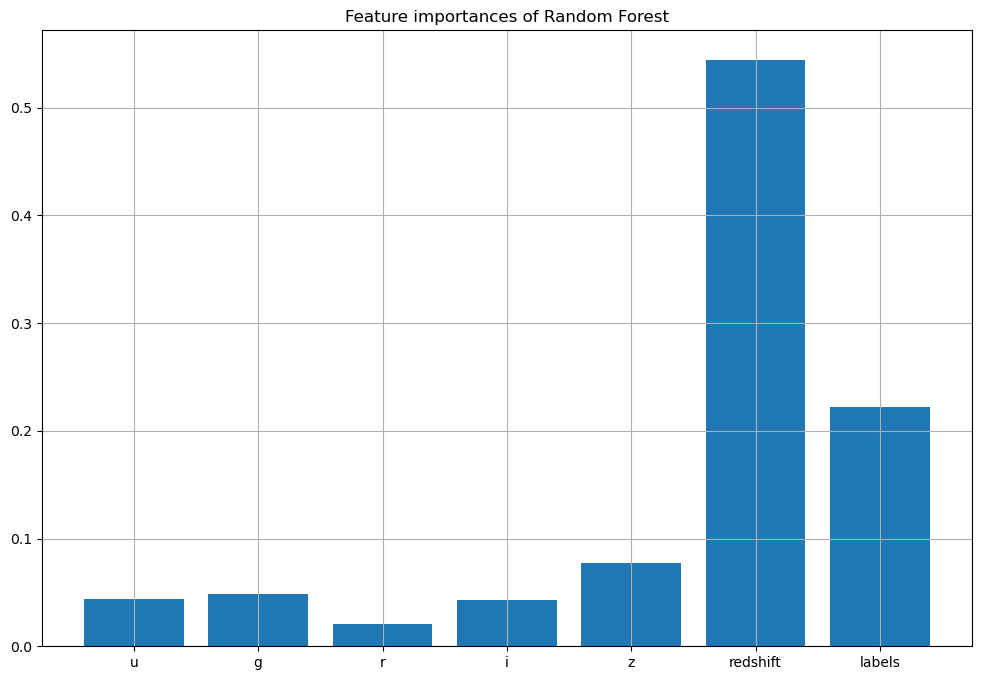

In [28]:
features = grid_search.feature_names_in_
importances = grid_search.best_estimator_.feature_importances_


plt.figure(figsize=(12,8))

plt.bar(features, importances);
plt.grid();
plt.title("Feature importances of Random Forest")

Redshift is one of the most important things in celstial objects classifications, since it tells us, how far away a particular object is, it's even more important than all of the filters combined. Now let's to build some linear model.

## 7.2 LogisticRegression

One of the most popular linear models for classification is the Logistic Regression. The cost function of this model goes like this: $J(\theta) = \sum_{i=1}^{m}[y^{(i)}log(\hat{p^{(i)}) + (1-y^{(i)})log(1-\hat{p^{(i)}})]}$. Using this cost function allows uwsto create a model of maximum likeihood, however it assumes that our data is gaussian like distributed around the our classes, so we must just assume that our data is gaussian like. The worse the assumption is, the worse model we get.

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver':['lbfgs','newton-cg', 'sag','saga']
}

log_clf = LogisticRegression(max_iter=5000, random_state=42, tol=0.0001, penalty='l2')

grid_search = GridSearchCV(log_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log = grid_search.best_estimator_
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[cv_results['rank_test_score']==1].head(1)
mean_score = cv_results['mean_test_score']
std_score = cv_results['std_test_score']
print(f"Best score for Logistic Regression model: {np.round(grid_search.best_score_,3)}")
print(f"Best parameters for Logistic Regression model: {grid_search.best_params_}")
print(f"Mean score after 5 splits: {round(float(mean_score.iloc[0]),3)} with std: {round(float(std_score.iloc[0]),3)}")

Best score for Logistic Regression model: 0.953
Best parameters for Logistic Regression model: {'C': 100, 'solver': 'sag'}
Mean score after 5 splits: 0.953 with std: 0.001


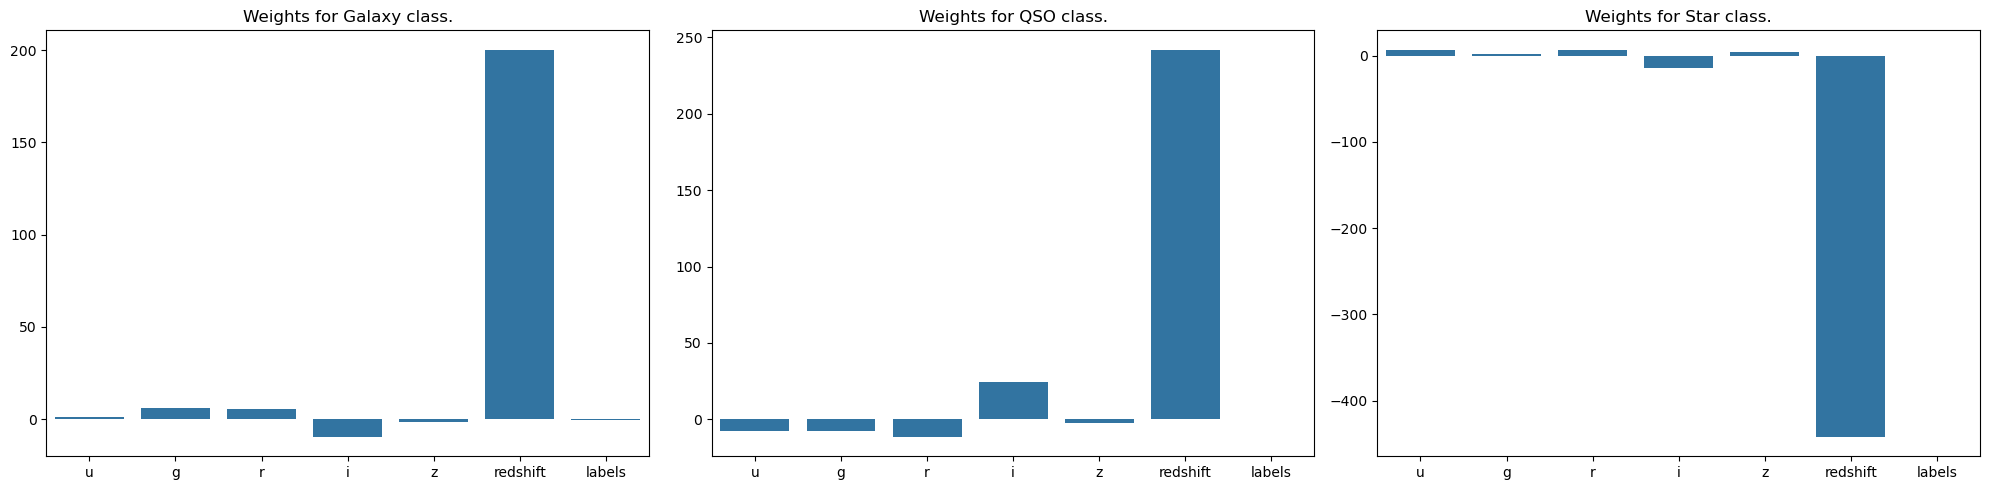

In [32]:
names = grid_search.feature_names_in_
coefs = grid_search.best_estimator_.coef_
classes = ["Galaxy", "QSO", "Star"]

fig, ax = plt.subplots(1,3, figsize=(20,5))

for i, objects in enumerate(classes):
    sns.barplot(x=names, y=coefs[i], ax=ax[i])
    ax[i].set_title(f"Weights for {objects} class.")
plt.tight_layout()

Logistic Regression is have the same result in accuracy as Random Forest model. We also can notice, than all "Star" class have significially different weight distribution than Galaxy and Quasar classes. Now let's focus on different Tree like models.

## 7.3 Adaptive Boosting

New estimator can correct his predecessor by giving more attention to the training samples, where previous algorithm was under trained. By this way, next algorithms can focus more on the difficult samples. For example, let's say that our main classifier is Decision Tree, and this algorithm is used as a predictor for our train data. Once we got our predictions, we algorithm will increase the weight of the samples for which we missclassified. Now we're training another Logistic Regression model with updated weights and the process repeats. Let's see how it's gonna work.

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree_clf = DecisionTreeClassifier(
    max_depth=2
)

ada_clf = AdaBoostClassifier(
    tree_clf,
    n_estimators=500,
    learning_rate=0.2,
    algorithm="SAMME"

)

scores = cross_val_score(ada_clf, X_train, y_train, cv=3)
scores_std = scores.std()

print(f"Average score for AdaBoostClassifier: {np.round(scores.mean(),3)}, with std: {np.round(scores_std,3)}")




Average score for AdaBoostClassifier: 0.969, with std: 0.001


As we see, a simple Decision Tree with just 4 leaves, with weights updated 500 times, can uplift our mean CV score by about 0.14. Training this model will take some more time but gaining 0.14 score increase it's worth the time.

## 7.4 Gradient Boosting

Another great boosting technique is `Gradient Boosting`. The main difference between AdaBoost and Gradient Boosting, it's that we do not update particular samples weights, we're trying to fit the predictor to the `residual error`. For example, first we're training a simple Decision Tree and then we get some predictions. Next, we're calculate the `residual error` $= y - \hat{y}$. Next model will be trained on the X train features, and residual values as an Y. Let's see the example:

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbrt_clf = GradientBoostingClassifier(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=500,
    n_iter_no_change=20
)

scores = cross_val_score(gbrt_clf, X_train, y_train, cv=3)
scores_std = scores.std()

print(f"Average score for GradientBoostClassifier: {np.round(scores.mean(),3)}, with std: {np.round(scores_std,3)}")


Average score for GradientBoostClassifier: 0.972, with std: 0.001


Gradient Boosting model performed just a slightly better than AdaBoost model. We will try just one more boosting model called XGBoost.

## 7.5 XGBoost

`XGBoost` is very similar to `GradientBoostingClassifier` however we can get access to much more hyperparametrs which allows us to create more complex models. Also, `XGBoost` is more optimized in terms of speed and adn performance.

In [40]:
from xgboost import XGBClassifier

In [45]:
param_grid = {
    "n_estimators":[200,400],
    "max_depth":[4,5],
    "learning_rate":[0.1, 0.3, 0.5],
    "reg_alpha":[0.01, 0.1, 1, 10],
    "reg_lambda":[0.01, 0.1 ,1 ,10]
    
}


xg_clf = XGBClassifier(
    n_jobs = -1
)

grid_search = GridSearchCV(xg_clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[cv_results['rank_test_score']==1].head(1)
mean_score = cv_results['mean_test_score']
std_score = cv_results['std_test_score']
print(f"Best score for XGBoost model model: {np.round(grid_search.best_score_,3)}")
print(f"Best parameters for XGBoost model: {grid_search.best_params_}")
print(f"Mean score after 3 splits: {round(float(mean_score.iloc[0]),3)} with std: {round(float(std_score.iloc[0]),3)}")


/opt/anaconda3/envs/moje_srodowisko/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score for XGBoost model model: 0.981
Best parameters for XGBoost model: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Mean score after 3 splits: 0.981 with std: 0.001


XGBoost model got even better results than regular Gradient Boosting model. The last we can do is combine best models into 1. This method is called `Stacking`.

## 7.6 Stacking

In this part, we will use best models that we've created in order to create 1 large model which potentially could give us even better results.

In [46]:
from sklearn.ensemble import StackingClassifier

In [48]:
stacking_clf = StackingClassifier(
    estimators=[
        ("rf", best_random_forest),
        ("ad", ada_clf),
        ("gb", gbrt_clf)
    ],
    final_estimator=best_clf,
    cv=5
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_leaf_nodes=10,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('ad',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.2,
                                                   n_estimators=500)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=500,...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.5,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=400, n_jobs=-1,
                                                 num_parallel_tree=None,
                                                 objective='multi:softprob', ...))

In [50]:
print(f"Score on Stacking classifier: {np.round(stacking_clf.score(X_train, y_train),3)}" )

Score on Stacking classifier: 0.971


All of our previous models combined gives us worse results than a singular one. This could happen, because probably our models are trained on predictions from cross validation process, and some of our models in our mixer are weaker than other. But, in summary, the best model that we were able to produce was XGoost model with 98.1% Accuracy on train data. Lets see how it's gonna perform on test data.

## 7.7 Final Evaluation on test data

In [54]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [56]:
test_predictions = best_clf.predict(X_test)
acc_score = np.round(accuracy_score(y_test, test_predictions),3)

print(f"Final accuracy on test data: {acc_score}")

Final accuracy on test data: 0.97


Getting 97% on the data that our model didn't see is a very good result. We could find some other methods in order to make the result better, but error  value of 3% is a pretty good result in terms of classification.